In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cp

In [2]:
dataset = pd.read_csv(filepath_or_buffer='Data.csv',header=None,names=['Attribute_1','Attribute_2','Label'])
dataset.head()

,Attribute_1,Attribute_2,Label
0,2.18960,3.2823,1
1,0.47045,6.3264,1
2,6.78860,7.5641,1
3,6.79300,9.9104,1
4,9.34690,3.6534,-1


## Q5(a)

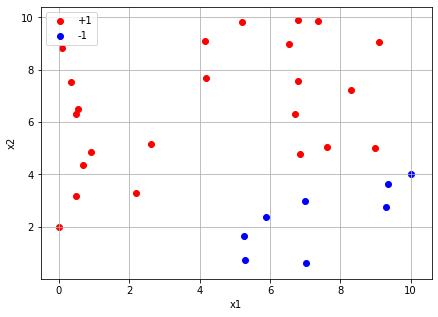

In [3]:
x = np.concatenate((dataset['Attribute_1'].values.reshape((dataset.shape[0],1)),dataset['Attribute_2'].values.reshape((dataset.shape[0],1))),axis=1)
y = dataset['Label'].values

label1 = (y==1)
label2 = (y==-1)
plt.scatter(x[label1,0],x[label1,1],color='red')
plt.scatter(x[label2,0],x[label2,1],color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(('+1','-1'))
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(7, 5)
plt.show()

## Q5(b)

In [4]:
m = x.shape[0]
d = x.shape[1]

w = cp.Variable(d)
b = cp.Variable()

obj = cp.Minimize((0.5*cp.norm(w,2)))

constraints = [(y[i]*(w.T*x[i] + b) >= 1) for i in range(m)]

prob = cp.Problem(obj,constraints)
prob.solve()

0.790569415288356

In [5]:
def plotClusters(x,y,w,b):
    # Takes in a set of datapoints x and y for two clusters,
    #  the hyperplane separating them in the form a'x -b = 0,
    #  and a slab half-width t
    d1_min = np.min(x[:,0])
    d1_max = np.max(x[:,0])
    # Line form: (-a[0] * x - b ) / a[1]
    d2_atD1min = (-w[0]*d1_min - b ) / w[1]
    d2_atD1max = (-w[0]*d1_max - b ) / w[1]

    sup_up_atD1min = (-w[0]*d1_min - b + 1 ) / w[1]
    sup_up_atD1max = (-w[0]*d1_max - b + 1 ) / w[1]
    sup_dn_atD1min = (-w[0]*d1_min - b - 1 ) / w[1]
    sup_dn_atD1max = (-w[0]*d1_max - b - 1 ) / w[1]

    # Plot the clusters!
    label1 = (y==1)
    label2 = (y==-1)
    plt.scatter(x[label1,0],x[label1,1],color='red')
    plt.scatter(x[label2,0],x[label2,1],color='blue')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(('+1','-1'))
    plt.plot([d1_min,d1_max],[d2_atD1min,d2_atD1max],color='black')
    plt.plot([d1_min,d1_max],[sup_up_atD1min,sup_up_atD1max],'--',color='gray')
    plt.plot([d1_min,d1_max],[sup_dn_atD1min,sup_dn_atD1max],'--',color='gray')
    plt.grid(True)
    fig = plt.gcf()
    fig.set_size_inches(7, 5)
    plt.show()

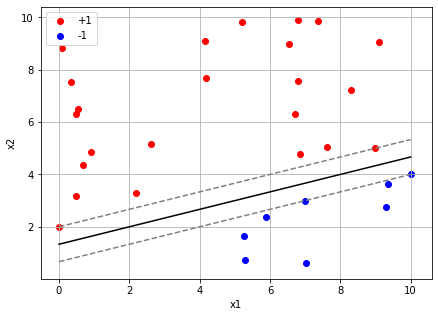

In [6]:
plotClusters(x,y,w.value,b.value)

In [7]:
print(1/LA.norm(w.value))

0.6324555317208284


In [8]:
print(w.value)

[-0.5  1.5]


In [9]:
print(b.value)

-2.0000000014167476


## Q5(c)

In [10]:
Q = np.multiply(x,y.reshape((y.shape[0],1)))
P = np.matmul(Q,Q.T)
P += 1e-13*np.eye(31)

In [11]:
m = x.shape[0]
d = x.shape[1]

a = cp.Variable(m)

obj = cp.Maximize((cp.sum(a) - (0.5*cp.quad_form(a,P))))

constraint1 = [0<= a]
constraint2 = [a*y == 0]

constraints = constraint1 + constraint2

prob = cp.Problem(obj,constraints)
prob.solve()

1.2499999999998785

In [12]:
a = a.value
xs = []
ys = []
for i in range(len(a)) :
    if (a[i]<1e-9):
        a[i]=0
    else:
        xs.append(x[i])
        ys.append(y[i])

xs = np.array(xs)
ys = np.array(ys)
print(xs)

[[ 7.  3.]
 [10.  4.]
 [ 0.  2.]
 [ 9.  5.]]


In [13]:
print(ys)

[-1 -1  1  1]


In [14]:
print(a)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.03178447 0.21821553 0.26059482
 0.98940518]


In [15]:
w = np.sum((a.reshape((a.shape[0],1))*Q),axis=0)
print(w)

[-0.5  1.5]
